In [1]:
%matplotlib inline
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import os
home_dir = os.environ['HOME'] + '/'
import pyCloudy as pc

/home/luis/anaconda3/lib/python3.8/site-packages/pyfits/__init__.py:21: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  warnings.warn('PyFITS is deprecated, please use astropy.io.fits',


In [2]:
# Define verbosity to high level (will print errors, warnings and messages)
pc.log_.level = 3

In [3]:
# The directory in which we will have the model
# You may want to change this to a different place so that the current directory
# will not receive all the Cloudy files.
dir_ = '../Model-PNNew/models/'

In [4]:
# Define some parameters of the model:
model_name = 'model_1'
full_model_name = '{0}{1}'.format(dir_, model_name)
dens = 3.4771212547196626 #log cm-3 (3000 cm^-3)
Teff = 130000. #K
qH = 37.5842 #s-1
r_min = 8.e16  #cm
dist = 2.31300952 #kpc (from gaia  Bailer-Jones C.A.L.)

In [5]:
# these are the commands common to all the models (here only one ...)
options = ('set save resolving power 1800',)

In [6]:
emis_tab = ['H  1  4861.33A',
            'H  1  6562.81A',
            'Ca B  5875.64A',
            'N  2  6583.45A',
            'O  1  6300.30A',
            'O  2  3726.03A',
            'O  2  3728.81A',
            'O  3  5006.84A',
            'BLND  4363.00A',
            'S  2  6716.44A',
            'S  2  6730.82A',
            'Cl 3  5517.71A',
            'Cl 3  5537.87A',
            'O  1  63.1679m',
            'O  1  145.495m',
            'C  2  157.636m']


In [7]:
abund = {'He' : -1.02, 'C' : -4.8, 'N' : -4.41, 'O' : 3.88, 'Ne' : -4.8, 
         'Si' : -5, 'S' : -5.4, 'Ar' : -6.23, 'Fe' : -20, 'Cl' : -20}

In [8]:
# Defining the object that will manage the input file for Cloudy
c_input = pc.CloudyInput(full_model_name)

In [9]:
# Filling the object with the parameters
# Defining the ionizing SED: Effective temperature and luminosity.
# The lumi_unit is one of the Cloudy options, like "luminosity solar", "q(H)", "ionization parameter", etc... 
c_input.set_BB(Teff = Teff, lumi_unit = 'q(H)', lumi_value = qH)

In [10]:
# Defining the density. You may also use set_dlaw(parameters) if you have a density law defined in dense_fabden.cpp.
c_input.set_cste_density(dens)

In [11]:
# Defining the inner radius. A second parameter would be the outer radius (matter-bounded nebula).
c_input.set_radius(r_in=np.log10(r_min))
c_input.set_abund(ab_dict = abund, nograins = True)
c_input.set_other(options)
c_input.set_iterate() # (0) for no iteration, () for one iteration, (N) for N iterations.
c_input.set_sphere() # () or (True) : sphere, or (False): open geometry.
c_input.set_emis_tab(emis_tab) # better use read_emis_file(file) for long list of lines, where file is an external file.
c_input.set_distance(dist=dist, unit='kpc', linear=True) # unit can be 'kpc', 'Mpc', 'parsecs', 'cm'. If linear=False, the distance is in log.

In [12]:
# Writing the Cloudy inputs. to_file for writing to a file (named by full_model_name). verbose to print on the screen.
c_input.print_input(to_file = True, verbose = False)

     CloudyInput: Input writen in ../Model-PNNew/models/model_1.in


In [13]:
# Printing some message to the screen
pc.log_.message('Running {0}'.format(model_name), calling = 'test1')

     test1: Running model_1


In [14]:
# Tell pyCloudy where your cloudy executable is:
pc.config.cloudy_exe = '../../../../../home/luis/Cloudy/source/cloudy.exe'

     _Config: cloudy_exe set to ../../../../../home/luis/Cloudy/source/cloudy.exe


In [15]:
# Running Cloudy with a timer. Here we reset it to 0.
pc.log_.timer('Starting Cloudy', quiet = True, calling = 'test1')
c_input.run_cloudy()
pc.log_.timer('Cloudy ended after seconds:', calling = 'test1')

     run_cloudy: running:  ../../../../../home/luis/Cloudy/source/cloudy.exe -p model_1
     run_cloudy: ending:  ../../../../../home/luis/Cloudy/source/cloudy.exe -p model_1
   test1: Cloudy ended after seconds: in 0.009640693664550781


/bin/sh: 1: ../../../../../home/luis/Cloudy/source/cloudy.exe: not found


In [16]:
# Reading the Cloudy outputs in the Mod CloudyModel object
Mod = pc.CloudyModel(full_model_name)

     CloudyModel ../Model-PNNew/models/model_1: Creating CloudyModel for ../Model-PNNew/models/model_1
     CloudyModel ../Model-PNNew/models/model_1: Li abundance not defined
     CloudyModel ../Model-PNNew/models/model_1: Be abundance not defined
     CloudyModel ../Model-PNNew/models/model_1: B abundance not defined
     CloudyModel ../Model-PNNew/models/model_1: Cl abundance not defined
     CloudyModel ../Model-PNNew/models/model_1: Sc abundance not defined
     CloudyModel ../Model-PNNew/models/model_1: Fe abundance not defined
     CloudyModel ../Model-PNNew/models/model_1: ../Model-PNNew/models/model_1.rad read
     CloudyModel ../Model-PNNew/models/model_1: Number of zones: 1
     CloudyModel ../Model-PNNew/models/model_1: ../Model-PNNew/models/model_1.phy read
     CloudyModel ../Model-PNNew/models/model_1: ../Model-PNNew/models/model_1.ele_H read
     CloudyModel ../Model-PNNew/models/model_1: filling H with 3 columns
     CloudyModel ../Model-PNNew/models/model_1: ../Model-

In [17]:
# Use TAB to know all the methods and variables for CloudyModel class
# Mod.TAB
dir(Mod) # This is the online answering way
# Description of this class is available here: http://pythonhosted.org//pyCloudy/classpy_cloudy_1_1c1d_1_1cloudy__model_1_1_cloudy_model.html

['C3D_comments',
 'H0_mass',
 'H_mass',
 'H_mass_cut',
 'H_mass_full',
 'Hbeta',
 'Hbeta_cut',
 'Hbeta_full',
 'Hbeta_label',
 'Hp_mass',
 'Phi',
 'Phi0',
 'Q',
 'Q0',
 'T0',
 'Teff',
 '_CloudyModel__H_mass_cut',
 '_CloudyModel__Hbeta_cut',
 '_CloudyModel__r_in_cut',
 '_CloudyModel__r_out_cut',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_H_mass_cut',
 '_get_Hbeta_cut',
 '_get_over_range',
 '_get_r_in_cut',
 '_get_r_out_cut',
 '_i_emis',
 '_i_line',
 '_init_abunds',
 '_init_all2zero',
 '_init_cont',
 '_init_emis',
 '_init_grains',
 '_init_heatcool',
 '_init_ionic',
 '_init_lin',
 '_init_opd',
 '_init_phy',
 '_init_pressure',
 '_init_rad',
 '_l_emis',
 '_quiet_

In [18]:
Mod.print_stats()

 Name of the model: ../Model-PNNew/models/model_1
 R_in (cut) = 7.998e+16 (7.998e+16), R_out (cut) = 7.998e+16 (7.998e+16)
 H+ mass = 1.45e-14, H mass = 1.04e-12 N zones: 1
 <H+/H> = 0.01, <He++/He> = 0.00, <He+/He> = 0.00
 <O+++/O> = 0.00, <O++/O> = 0.00, <O+/O> = 0.00
 <N+++/N> = 0.00, <N++/N> = 0.00, <N+/N> = 0.00
 T(O+++) = nan, T(O++) = 20, T(O+) = 20
 <ne> = 66,  <nH> = 2999, T0 = 20, t2=0.0000
 <log U> = -11.28


In [19]:
Mod.get_ab_ion_vol_ne('O',2)

5.639999999999999e-15

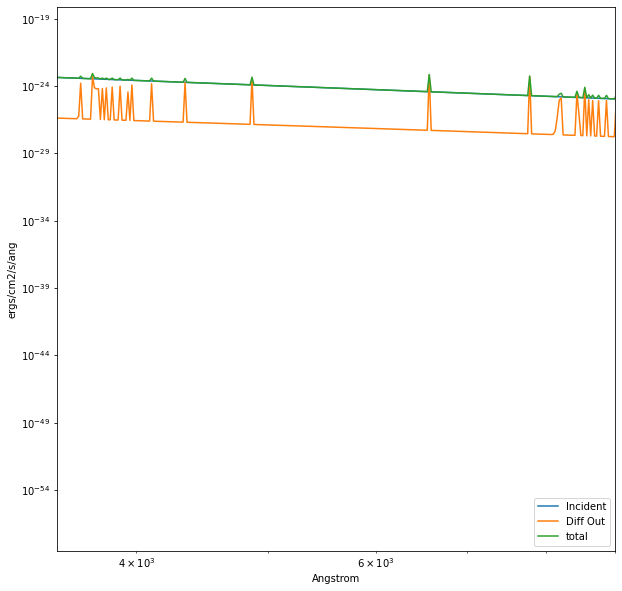

In [30]:
plt.figure(figsize=(10,10))
plt.loglog(Mod.get_cont_x(unit='Ang'), Mod.get_cont_y(cont = 'incid', unit = 'esAc'), label = 'Incident')
plt.loglog(Mod.get_cont_x(unit='Ang'), Mod.get_cont_y(cont = 'diffout', unit = 'esAc'), label = 'Diff Out')
plt.loglog(Mod.get_cont_x(unit='Ang'), Mod.get_cont_y(cont = 'total', unit = 'esAc'), label = 'total')
plt.xlim((3500, 9000))
#plt.ylim((1e-21, 1e-9))
plt.xlabel('Angstrom')
plt.ylabel('ergs/cm2/s/ang')
plt.legend(loc=4);

In [33]:
wl = Mod.get_cont_x(unit='Ang')
flux = Mod.get_cont_y(cont = 'total', unit = 'esAc')
#Ordered lambda and flux 
wll, flux = zip(*sorted(zip(wl, flux)))

In [47]:
data = Table([wll, flux], names=('Wl', 'Flux'), meta={'name': 'first table'})
mask = (data["Wl"] > 3000) & (data["Flux"] < 9000)
data_mask = data[mask]

In [38]:
data.write("../Model-PNNew/teste.dat", format="ascii", overwrite=True)

No handles with labels found to put in legend.


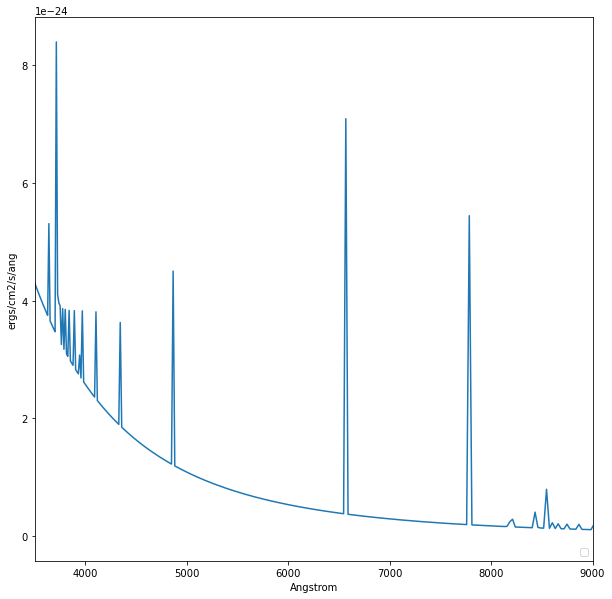

In [49]:
plt.figure(figsize=(10,10))
plt.plot(data_mask["Wl"], data_mask["Flux"])#, label = 'total')
plt.xlim((3500, 9000))
#plt.ylim((-0.1, 10e-9))
plt.xlabel('Angstrom')
plt.ylabel('ergs/cm2/s/ang')
plt.legend(loc=4);

# Our PN and the model

In [72]:
from astropy.io import fits
import numpy as np
hdu = fits.open("../Spectra-lamostdr7/spec-56581-VB031N50V1_sp08-218.fits")
hdudata = hdu[0].data

In [73]:
wl = hdudata[2]
Flux = hdudata[0]

No handles with labels found to put in legend.


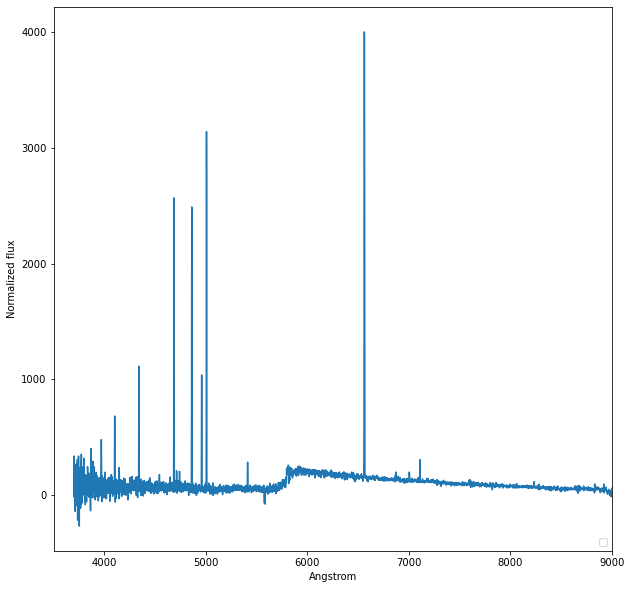

In [74]:
plt.figure(figsize=(10,10))
plt.plot(wl, Flux)#, label = 'total')
plt.xlim((3500, 9000))
#plt.ylim((-0.1, 10e-9))
plt.xlabel('Angstrom')
plt.ylabel('Normalized flux')
plt.legend(loc=4);

Normalized with Hbeta

In [75]:
#the model
mask_Hbeta_ = data_mask["Wl"] == 4865.722198762915
Hbeta_ = data_mask[mask_Hbeta_]
Hbeta_

Wl,Flux
float64,float64
4865.722198762915,4.501267169353754e-24


In [77]:
def closest(lst, K):
    '''find the closest number'''
    lst = np.array(lst)
    idx = (np.abs(lst - K)).argmin()
    return lst[idx]

In [78]:
wl_hbeta = closest(data_mask["Wl"], 4861.333)

In [83]:
MaskHbeta = data_mask["Wl"] == wl_hbeta
HBeta = data_mask[MaskHbeta]
HBeta

Wl,Flux
float64,float64
4865.722198762915,4.501267169353754e-24


In [93]:
flux_m = data_mask["Flux"] / HBeta["Flux"]

In [94]:
# Our PN
wl_hbeta_our = closest(wl, 4861.333)

In [95]:
MaskHbeta_our = wl == wl_hbeta_our
flux_HBeta_our = Flux[MaskHbeta_our]
flux_HBeta_our

array([1963.5988], dtype=float32)

In [96]:
flux_our = Flux / flux_HBeta_our

No handles with labels found to put in legend.


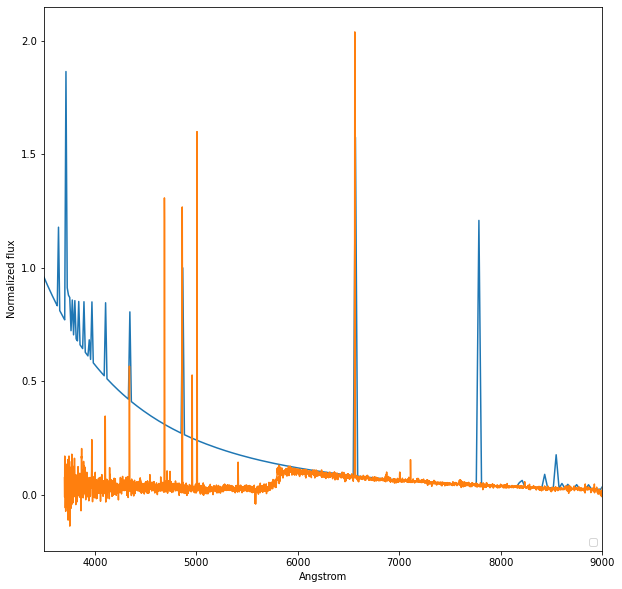

In [98]:
plt.figure(figsize=(10,10))
plt.plot(data_mask["Wl"], flux_m)#, label = 'total')
plt.plot(wl, flux_our)#, label = 'total')
plt.xlim((3500, 9000))
#plt.ylim((-0.1, 10e-9))
plt.xlabel('Angstrom')
plt.ylabel('Normalized flux')
plt.legend(loc=4);